<a href="https://colab.research.google.com/github/Sharanya1804/BreastCancerDetection/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Classification - Mini ML Project

## Problem Statement
Predict whether a tumor is malignant or benign based on cell features.

## Dataset
Breast Cancer Wisconsin Dataset (Kaggle)

## Objective
Build and evaluate classification models to assist early cancer detection.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, roc_auc_score, roc_curve
)

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
upload=files.upload()


Saving data.csv to data.csv


Load Dataset

In [ ]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data Cleaning

In [ ]:
data.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

# Convert target to binary
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

print(data.shape)
print(data["diagnosis"].value_counts())

(569, 31)
diagnosis
0    357
1    212
Name: count, dtype: int64


Exploratory Data Analysis

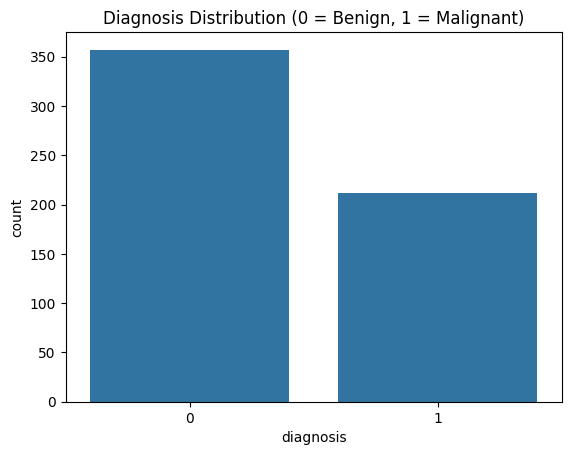

In [ ]:
plt.figure()
sns.countplot(x="diagnosis", data=data)
plt.title("Diagnosis Distribution (0 = Benign, 1 = Malignant)")
plt.show()


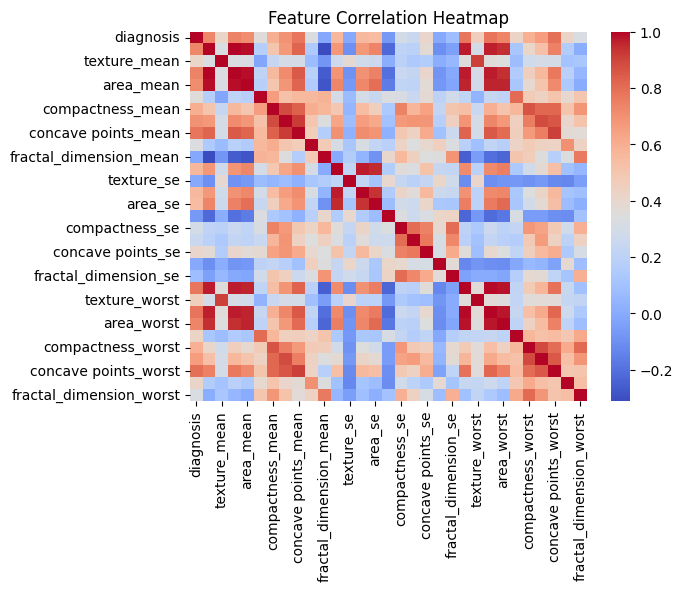

In [ ]:
plt.figure()
sns.heatmap(data.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


Feature & Target Split

In [ ]:
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Feature Scaling

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression Model

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_log))

print("ROC-AUC:",
      roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1]))

print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9649122807017544
ROC-AUC: 0.996031746031746
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Random Forest Model

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))

print("ROC-AUC:",
      roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))

print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9736842105263158
ROC-AUC: 0.9928902116402116
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Feature Importance (Random Forest)

In [ ]:
importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)
feature_importance.sort_values(ascending=False).head(10)

,0
area_worst,0.151412
concave points_worst,0.126497
radius_worst,0.093475
perimeter_worst,0.083642
concave points_mean,0.081082
perimeter_mean,0.077126
radius_mean,0.061990
concavity_mean,0.050818
area_mean,0.045916
concavity_worst,0.030022


Test Model with Sample Data

In [ ]:
# ==============================
# Test Model on Sample Data
# ==============================

# Select a random sample from test set
sample_index = np.random.randint(0, len(X_test))

sample_data = X_test[sample_index].reshape(1, -1)
actual_label = y_test.iloc[sample_index]

# Predict using Random Forest (you can change to log_model if needed)
prediction = rf_model.predict(sample_data)[0]
probability = rf_model.predict_proba(sample_data)[0][1]

# Convert numeric prediction to label
label_map = {0: "Benign", 1: "Malignant"}

print("🔎 Sample Index:", sample_index)
print("Actual Diagnosis:", label_map[actual_label])
print("Predicted Diagnosis:", label_map[prediction])
print("Prediction Probability (Malignant): {:.2f}%".format(probability * 100))


🔎 Sample Index: 104
Actual Diagnosis: Benign
Predicted Diagnosis: Benign
Prediction Probability (Malignant): 0.00%


Manually Test Custom Input

In [ ]:
# ==============================
# Manual Custom Input Test
# ==============================

# Example: take mean values of features as base
custom_input = X.mean().values.reshape(1, -1)

# Scale input
custom_input_scaled = scaler.transform(custom_input)

prediction = rf_model.predict(custom_input_scaled)[0]
probability = rf_model.predict_proba(custom_input_scaled)[0][1]

label_map = {0: "Benign", 1: "Malignant"}

print("Predicted Diagnosis:", label_map[prediction])
print("Prediction Probability (Malignant): {:.2f}%".format(probability * 100))


Predicted Diagnosis: Benign
Prediction Probability (Malignant): 24.00%


Confusion Matrix Visualisation

<Figure size 640x480 with 0 Axes>

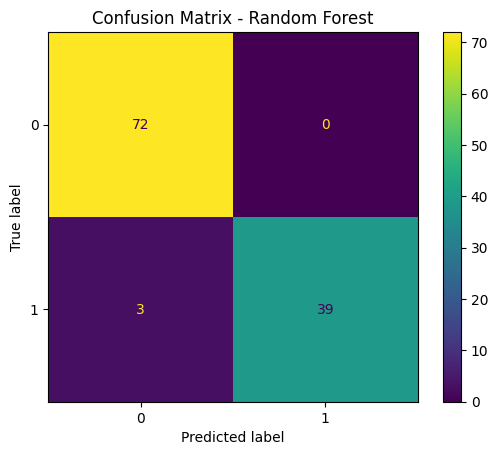

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure()
ConfusionMatrixDisplay.from_estimator(
    rf_model,
    X_test,
    y_test
)
plt.title("Confusion Matrix - Random Forest")
plt.show()


ROC Curve Visualisation

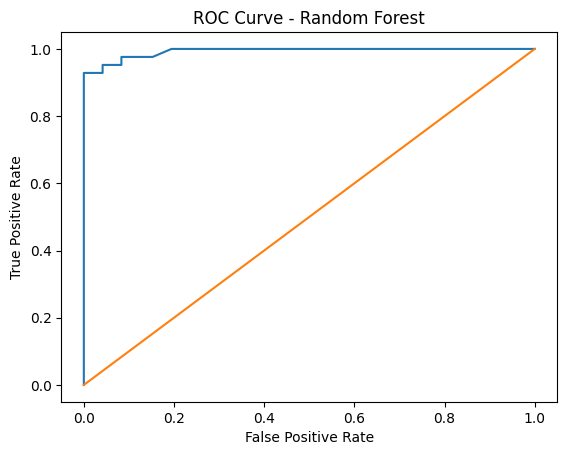

In [ ]:
from sklearn.metrics import roc_curve

y_probs = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.show()


Feature Importance Visualization

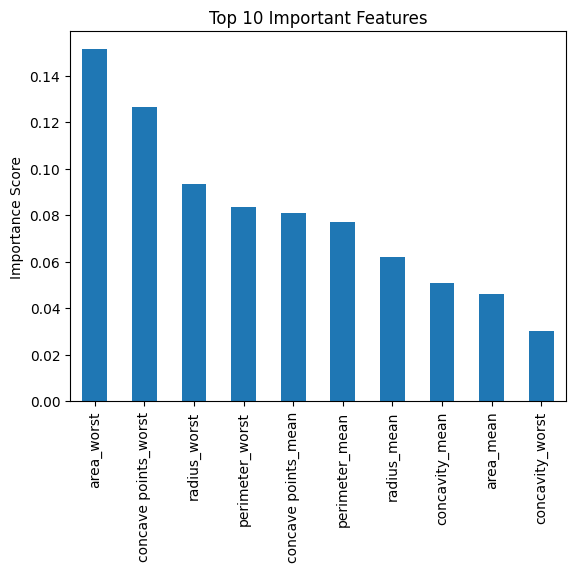

In [ ]:
importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)

top_features = feature_importance.sort_values(ascending=False).head(10)

plt.figure()
top_features.plot(kind="bar")
plt.title("Top 10 Important Features")
plt.ylabel("Importance Score")
plt.show()

Probability Distribution Plot

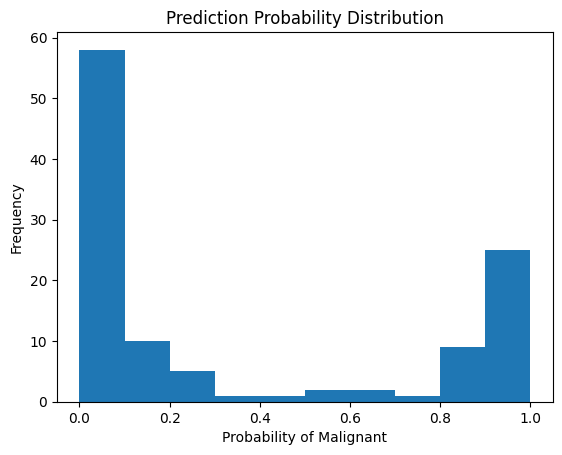

In [ ]:
plt.figure()
plt.hist(y_probs)
plt.title("Prediction Probability Distribution")
plt.xlabel("Probability of Malignant")
plt.ylabel("Frequency")
plt.show()